# **Wind Energy Efficiency**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import *

In [23]:
df=pd.read_csv(r'/content/drive/MyDrive/Intellipaat/Wind Energy Efficiency Project/wind_data.csv')
df

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909599,2021-04-25 19:12:00,929.101908,948.441905,32.736076,1187.303192,83.187140,1343.320577,32.291391,35.152280,152.216446,191.088800,189.901812,7.155343,1.028960,Turbine_13,50.768675
909600,2021-02-20 17:37:00,100.730526,88.694599,30.540500,770.245593,56.235497,177.620552,30.434302,29.932141,85.353107,96.621675,93.417590,4.121607,0.595874,Turbine_158,44.234821
909601,2021-10-22 14:18:00,1120.915965,1165.016907,30.901129,1170.456860,62.942943,873.414622,30.491818,33.085164,42.820210,74.111173,230.988398,8.551669,0.951241,Turbine_15,46.942486
909602,2021-02-08 22:03:00,123.444564,116.066919,32.697933,770.190796,57.245207,95.865704,32.338824,31.525384,86.549094,97.470984,65.408801,4.324064,0.247335,Turbine_97,46.392221


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909604 entries, 0 to 909603
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   timestamp                               909604 non-null  object 
 1   active_power_calculated_by_converter    909604 non-null  float64
 2   active_power_raw                        909604 non-null  float64
 3   ambient_temperature                     909604 non-null  float64
 4   generator_speed                         909604 non-null  float64
 5   generator_winding_temp_max              909604 non-null  float64
 6   grid_power10min_average                 909604 non-null  float64
 7   nc1_inside_temp                         909604 non-null  float64
 8   nacelle_temp                            909604 non-null  float64
 9   reactice_power_calculated_by_converter  909604 non-null  float64
 10  reactive_power                          9096

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
active_power_calculated_by_converter,909604.0,525.886061,474.619576,0.000000,149.620898,379.989929,781.357475,1999.999858
active_power_raw,909604.0,537.639468,482.394907,0.000008,155.813244,383.985926,800.261108,1999.984456
ambient_temperature,909604.0,25.573921,8.025649,5.616541,17.093680,27.919035,32.171696,48.089017
generator_speed,909604.0,931.130882,193.674384,0.000000,770.538574,884.068502,1123.335856,1267.140625
generator_winding_temp_max,909604.0,60.730112,9.721582,25.636366,54.916767,60.034490,65.737187,129.846405
grid_power10min_average,909604.0,527.579537,472.656976,0.000000,147.181552,391.303187,794.875710,1999.991455
nc1_inside_temp,909604.0,31.755823,3.929794,11.141922,29.913803,31.762946,33.469745,52.790030
nacelle_temp,909604.0,31.686413,3.554426,16.010218,30.267423,31.961610,33.546260,48.406106
reactice_power_calculated_by_converter,909604.0,111.080610,78.219944,-318.393721,81.540850,92.005826,124.879153,523.892695
reactive_power,909604.0,133.692333,91.232152,-5.461607,96.045765,107.633378,154.153730,592.815938


<ipython-input-26-0f3f8cf65418>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Target'])


<Axes: xlabel='Target', ylabel='Density'>

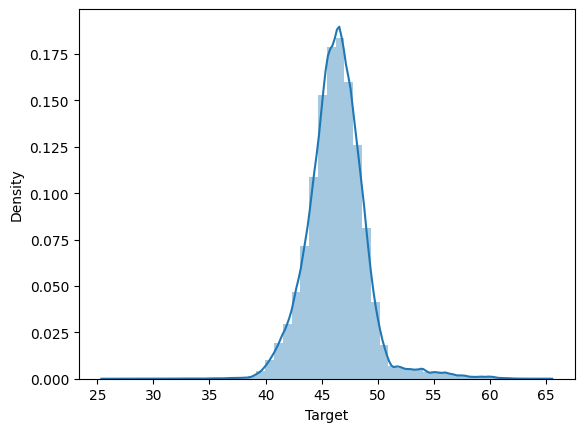

In [26]:
sns.distplot(df['Target'])

In [27]:
from scipy.stats import skew
skew(df['Target'])
# right skewed data

0.7053582386922606

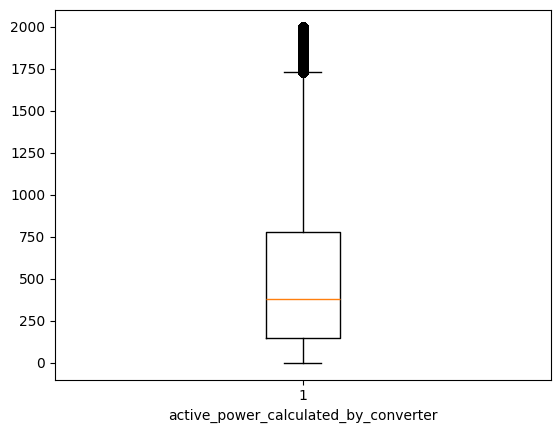

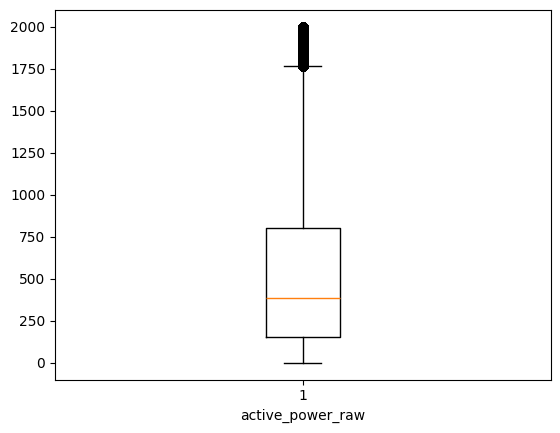

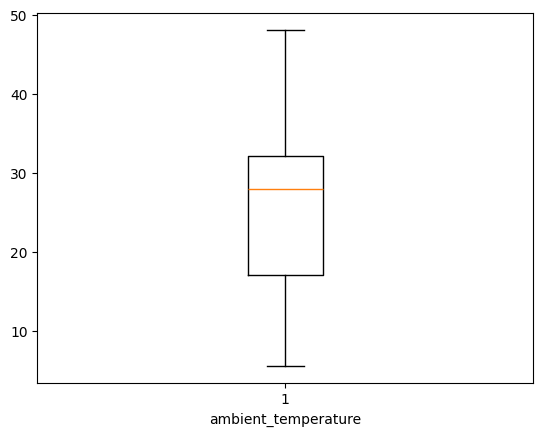

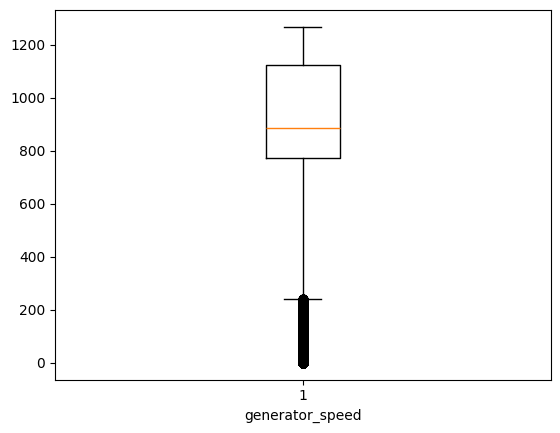

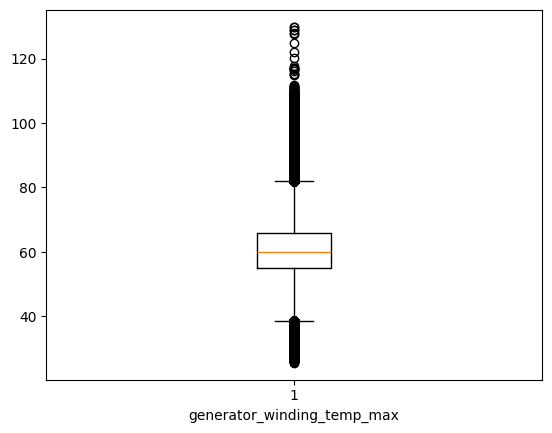

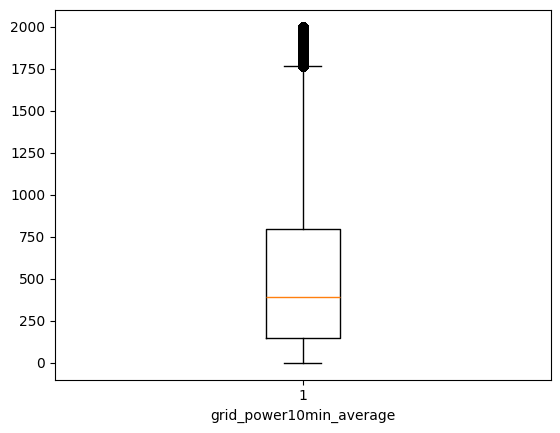

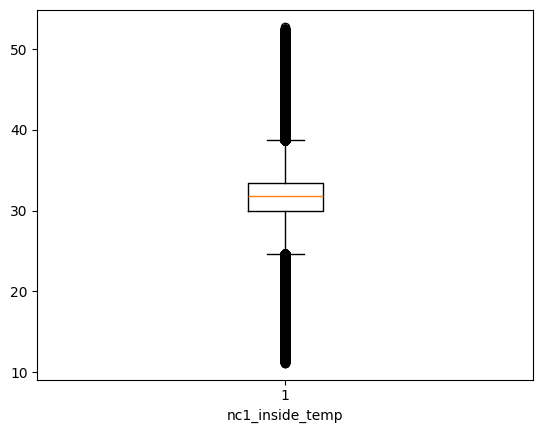

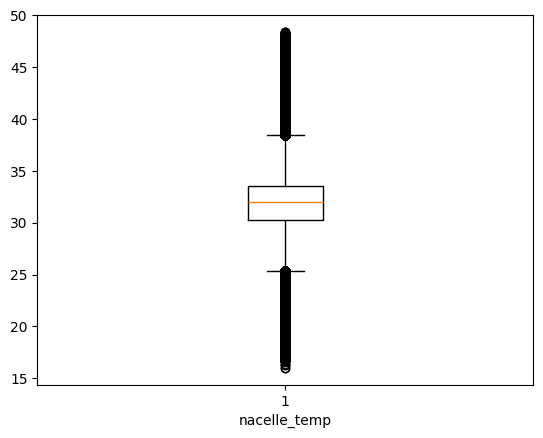

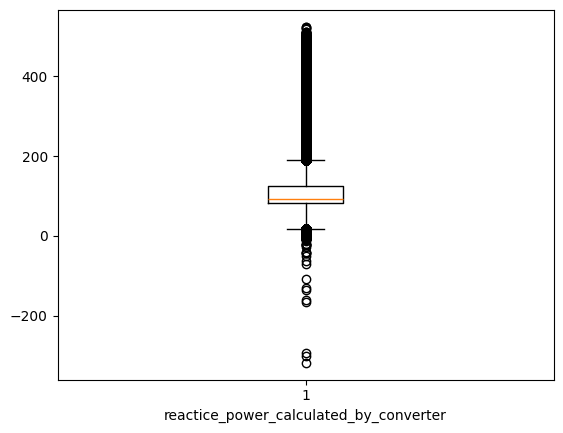

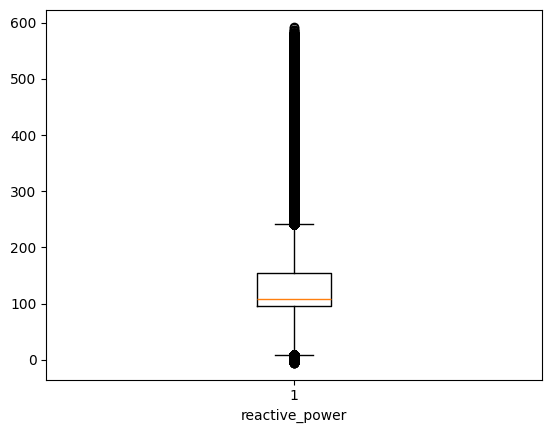

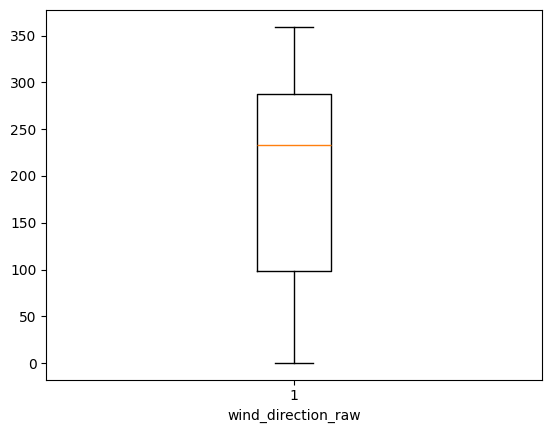

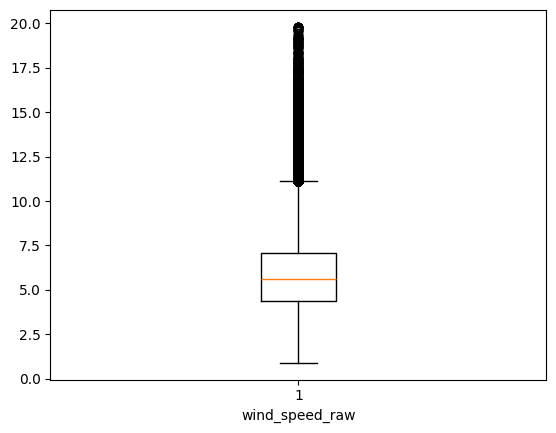

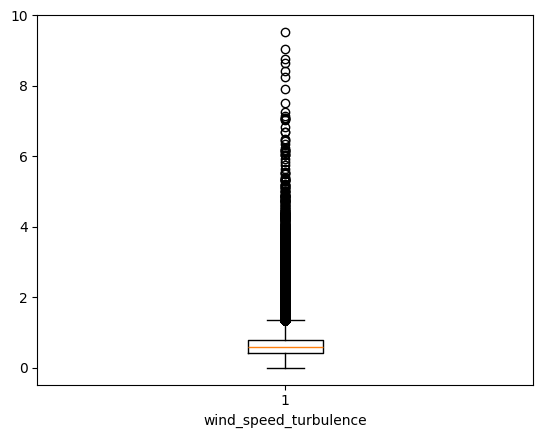

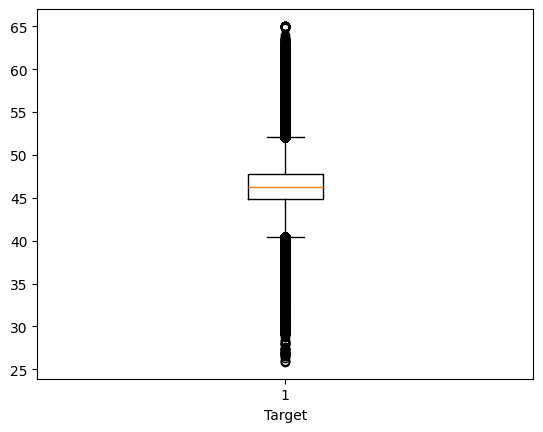

In [28]:
#visualization of outliers
for col in df.columns:
  if df[col].dtype!='object':
    plt.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [29]:
dff=df.copy()

In [30]:
for col in dff.columns:
  if dff[col].dtype!='object':
    q3=dff[col].quantile(0.75)
    q1=dff[col].quantile(0.25)
    iqr=q3-q1
    upper=q3+1.5*iqr
    lower=q1-1.5*iqr
    dff= dff[(dff[col]<=upper) & (dff[col]>=lower)]

In [31]:
dff.shape

(497528, 16)

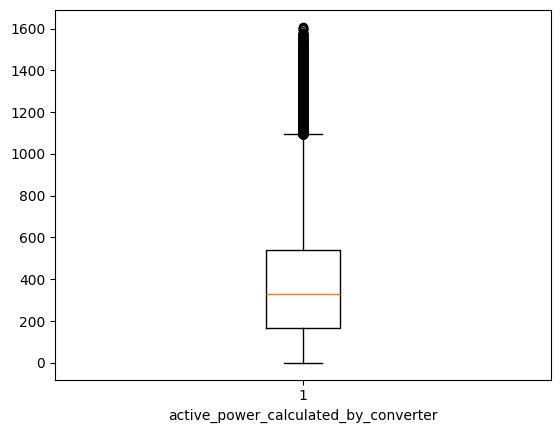

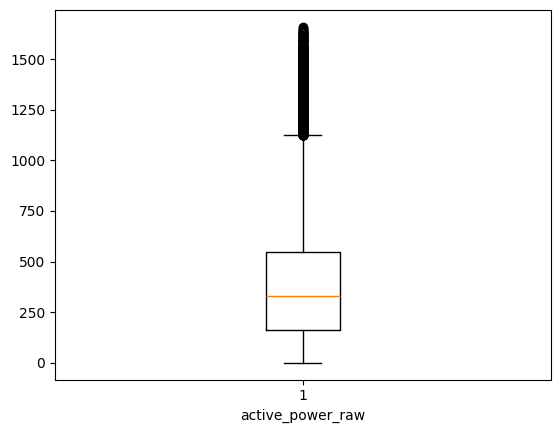

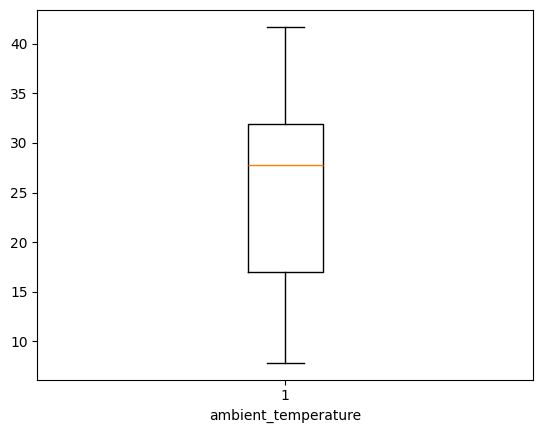

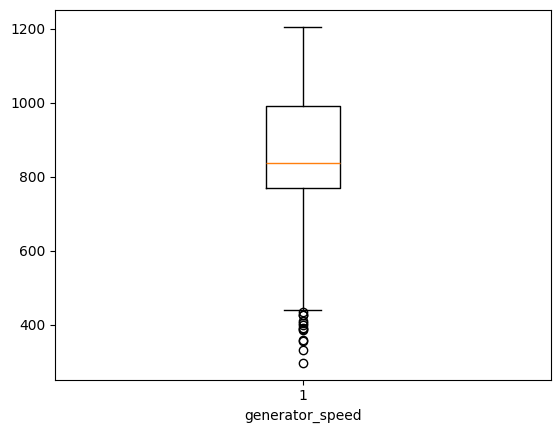

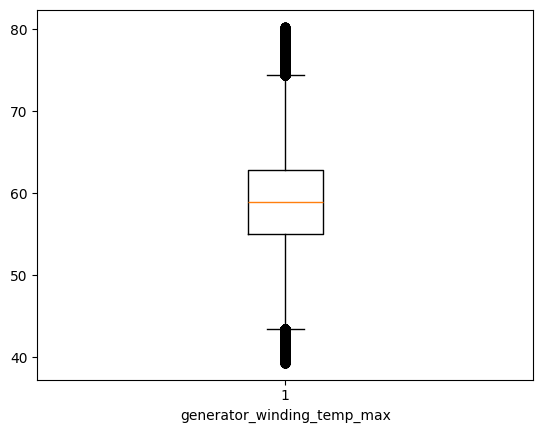

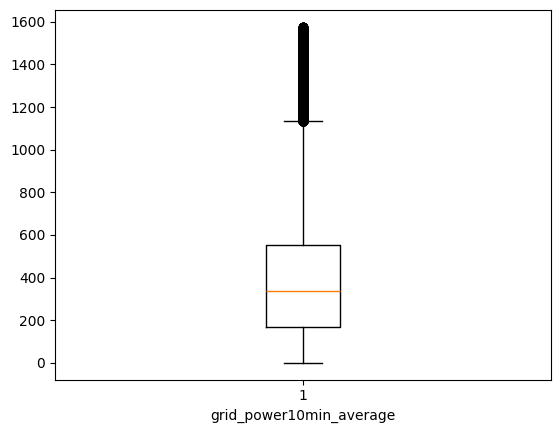

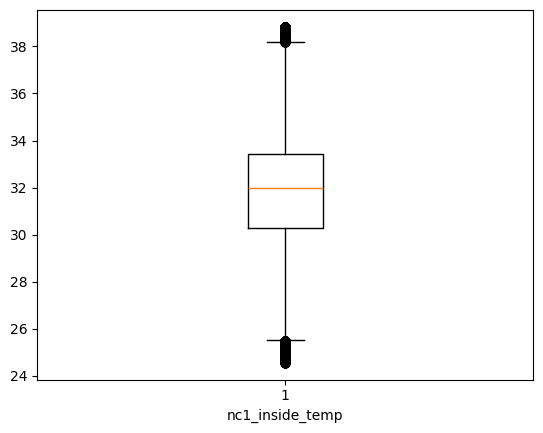

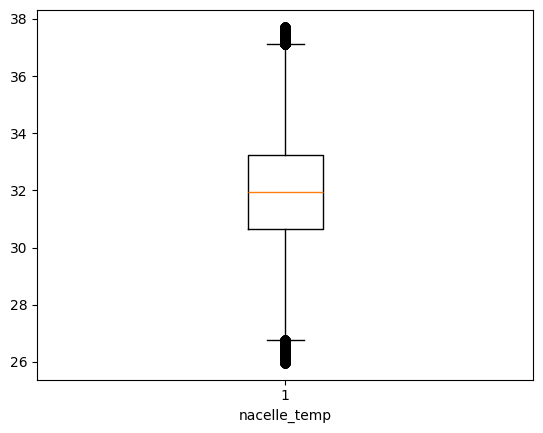

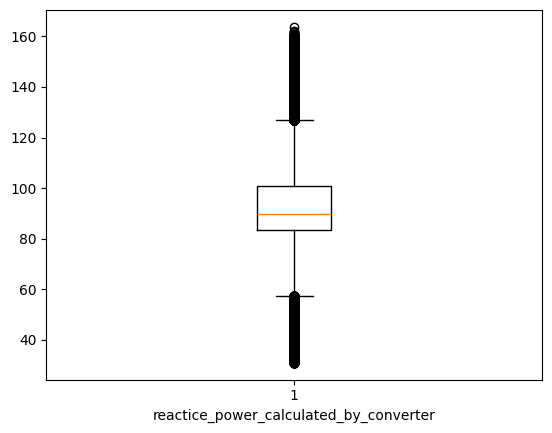

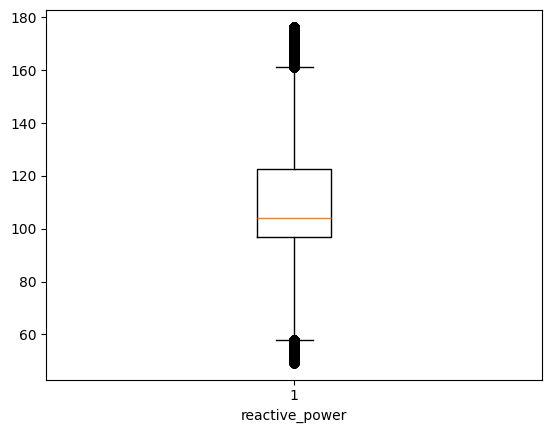

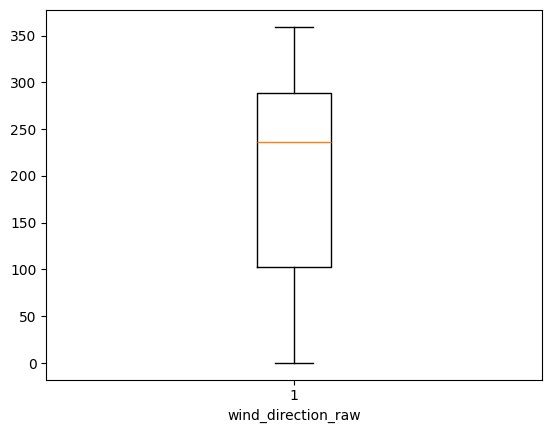

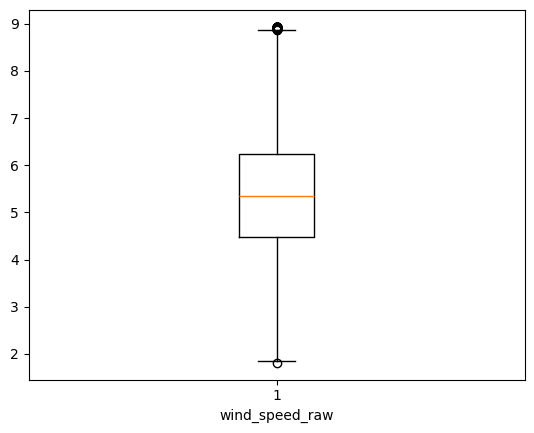

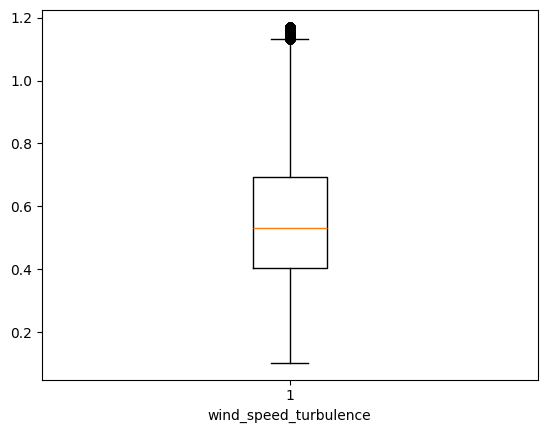

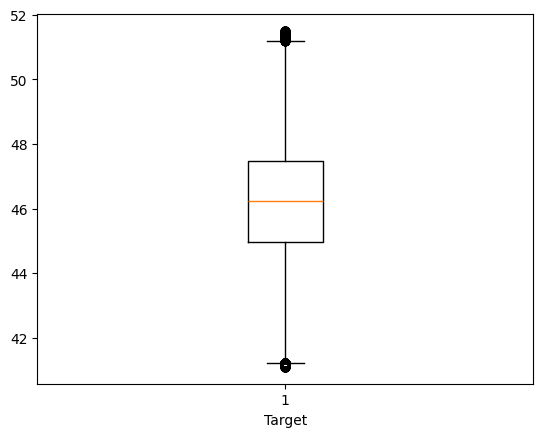

In [32]:
for col in dff.columns:
  if dff[col].dtype!='object':
    plt.boxplot(dff[col])
    plt.xlabel(col)
    plt.show()
# after outlier analysis if still outliers are present, its because the new data which is formed after outlier analysis, in that data it is considering few existing values
# as new outliers

In [33]:
dff['timestamp']=pd.to_datetime(dff['timestamp'])

In [34]:
# if we were using time series analysis then we set the 'timestamp' column as index
dff=dff.set_index(dff['timestamp'])
dff

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
timestamp,,,,,,,,,,,,,,,,
2021-02-19 20:18:00,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
2021-04-27 04:55:00,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2021-10-30 03:47:00,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
2021-05-28 06:33:00,2021-05-28 06:33:00,603.877940,620.637583,28.055220,955.604563,60.882138,697.721731,31.012207,31.054668,57.950467,75.779110,229.571665,6.026029,0.779887,Turbine_15,47.947959
2021-07-15 14:44:00,2021-07-15 14:44:00,468.044851,469.828186,17.189911,876.035055,63.952785,675.510671,31.469155,33.117485,87.047708,119.317791,175.583277,4.864594,0.996903,Turbine_103,47.616581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-25 11:49:00,2021-05-25 11:49:00,416.748281,416.255020,32.506697,927.038991,61.528378,353.019704,30.004473,32.241504,94.939171,117.733730,99.068567,5.722023,0.581206,Turbine_108,47.893845
2021-02-11 04:49:00,2021-02-11 04:49:00,102.308385,92.815414,22.041527,769.630778,44.864599,150.804476,33.512226,30.560733,86.925824,98.310251,24.632681,4.705168,0.374873,Turbine_103,46.223015
2021-02-20 17:37:00,2021-02-20 17:37:00,100.730526,88.694599,30.540500,770.245593,56.235497,177.620552,30.434302,29.932141,85.353107,96.621675,93.417590,4.121607,0.595874,Turbine_158,44.234821


In [35]:
# while working with PCA technique, we don't consider outliers. If later you feel accuracy is low then maybe you can, but right now we will proceed with DF only (not dff)

In [36]:
y=df['Target']
x= df.drop(['timestamp','turbine_id','Target'],axis=1)

In [44]:
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x,columns=df.drop(['timestamp','turbine_id','Target'],axis=1).columns)

In [46]:
#PCA implementation
pca=PCA(n_components=0.95)
pca.fit(x)
x=pca.fit_transform(x)

In [47]:
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6
0,1.677274,0.330386,0.274303,0.790720,-1.000739,-0.359201,-0.413761
1,-0.593959,-0.306606,1.410909,-1.159831,-0.405633,0.179048,-0.397918
2,4.031848,-6.190135,-0.591438,1.832399,0.409844,0.790188,0.103882
3,-2.715778,0.302205,-0.968835,-0.423444,0.809260,-0.981932,1.060612
4,0.562806,0.357439,0.545970,0.723757,-1.457427,-0.003791,-0.020135
...,...,...,...,...,...,...,...
909599,3.156614,1.577054,-0.389591,0.665949,0.470244,0.664960,-1.240516
909600,-1.963339,-0.413626,-1.040631,0.465985,0.402914,0.335999,0.480738
909601,1.802108,0.453670,0.051951,0.899072,0.473143,-1.410836,-1.605279
909602,-2.186589,0.022413,-1.551523,0.190128,-0.663333,0.512325,0.354293


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=25)

In [52]:
model=LinearRegression()
model.fit(x_train,y_train)
predict=model.predict(x_test)
print('RMSE=',root_mean_squared_error(y_test,predict))
print('R2 Score=',r2_score(y_test,predict))

RMSE= 2.0385155020040497
R2 Score= 0.39040940842486094


In [71]:
#since R2 Score is not good and RMSE is good so we will use feature selection before PCA to improve the model evaluation

In [59]:
# Feature Selection (using correlation)
df.corr(numeric_only=True)

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target
active_power_calculated_by_converter,1.000000,0.996435,-0.055748,0.865399,0.704785,0.951129,-0.048977,-0.114523,0.859807,0.890428,0.047813,0.933014,0.517178,-0.041087
active_power_raw,0.996435,1.000000,-0.053158,0.854905,0.700618,0.950450,-0.048257,-0.112044,0.846891,0.880181,0.047419,0.931078,0.519473,-0.040516
ambient_temperature,-0.055748,-0.053158,1.000000,-0.066242,0.090796,-0.062978,0.257850,0.365564,-0.078901,-0.083129,-0.015721,-0.088032,0.049475,0.420487
generator_speed,0.865399,0.854905,-0.066242,1.000000,0.578988,0.830755,-0.063460,-0.157969,0.701424,0.726535,0.036872,0.829254,0.404138,-0.042414
generator_winding_temp_max,0.704785,0.700618,0.090796,0.578988,1.000000,0.748013,0.056168,0.227567,0.666822,0.683035,0.096984,0.635969,0.452987,0.295409
grid_power10min_average,0.951129,0.950450,-0.062978,0.830755,0.748013,1.000000,-0.057500,-0.134016,0.807921,0.840253,0.049098,0.893555,0.496686,-0.049738
nc1_inside_temp,-0.048977,-0.048257,0.257850,-0.063460,0.056168,-0.057500,1.000000,0.691790,-0.042599,-0.048746,0.067772,-0.058853,0.069330,0.201853
nacelle_temp,-0.114523,-0.112044,0.365564,-0.157969,0.227567,-0.134016,0.691790,1.000000,-0.088603,-0.098586,0.147899,-0.167366,0.164580,0.508957
reactice_power_calculated_by_converter,0.859807,0.846891,-0.078901,0.701424,0.666822,0.807921,-0.042599,-0.088603,1.000000,0.993317,0.035202,0.790763,0.442172,-0.033477
reactive_power,0.890428,0.880181,-0.083129,0.726535,0.683035,0.840253,-0.048746,-0.098586,0.993317,1.000000,0.037892,0.827514,0.458801,-0.034994


In [54]:
cols=['ambient_temperature','generator_winding_temp_max','nc1_inside_temp','nacelle_temp','wind_direction_raw','wind_speed_turbulence']
x=df[cols]

In [55]:
x=sc.fit_transform(x)
x=pd.DataFrame(x,columns=cols)

In [57]:
pca=PCA(n_components=0.95)
pca.fit(x)
x=pca.fit_transform(x)
x=pd.DataFrame(x)
x

,0,1,2,3,4
0,0.475328,0.069828,0.387446,0.919800,-0.522705
1,-0.362315,0.050539,1.537484,-1.032763,-0.498886
2,-5.579063,2.681072,-1.320934,1.615194,-0.206866
3,-0.128236,-1.593172,-0.629011,-0.454795,1.713598
4,0.343496,-0.385662,0.823610,1.012609,-0.839480
...,...,...,...,...,...
909599,2.085050,1.579418,-0.977314,0.365110,-0.751150
909600,-0.621529,-0.518841,-1.054034,0.403203,0.278247
909601,0.721436,0.633716,-0.152464,0.617245,0.517592
909602,-0.337458,-1.523197,-1.155133,0.346734,-0.553443


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=25)
model=LinearRegression()
model.fit(x_train,y_train)
predict=model.predict(x_test)
print('RMSE=',root_mean_squared_error(y_test,predict))
print('R2 Score=',r2_score(y_test,predict))

RMSE= 2.151300683019404
R2 Score= 0.3210896198201598


In [72]:
# since RE score is again not good so we will use variance inflation factor for feature selection before feature extraction using PCA

In [89]:
# feature selection (using VIF- variance inflation factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
x=df.drop(['timestamp','turbine_id','Target'],axis=1)
y=df['Target']

In [91]:
df1=pd.DataFrame()
df1['columns']=x.columns
df1['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
df1

,columns,VIF
0,active_power_calculated_by_converter,398.566300
1,active_power_raw,361.707774
2,ambient_temperature,13.134672
3,generator_speed,75.538793
4,generator_winding_temp_max,127.768808
5,grid_power10min_average,30.870003
6,nc1_inside_temp,140.004469
7,nacelle_temp,255.939425
8,reactice_power_calculated_by_converter,328.529943
9,reactive_power,427.087748


In [92]:
x.drop('active_power_calculated_by_converter',axis=1,inplace=True)

In [93]:
df1=pd.DataFrame()
df1['columns']=x.columns
df1['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
df1

,columns,VIF
0,active_power_raw,44.014580
1,ambient_temperature,13.133927
2,generator_speed,72.033438
3,generator_winding_temp_max,126.938436
4,grid_power10min_average,30.190716
5,nc1_inside_temp,139.488695
6,nacelle_temp,255.583007
7,reactice_power_calculated_by_converter,319.646415
8,reactive_power,423.553697
9,wind_direction_raw,4.824718


In [94]:
x.drop('reactive_power',axis=1,inplace=True)

In [95]:
df1=pd.DataFrame()
df1['columns']=x.columns
df1['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
df1

,columns,VIF
0,active_power_raw,40.939031
1,ambient_temperature,13.102296
2,generator_speed,70.251025
3,generator_winding_temp_max,126.042200
4,grid_power10min_average,30.190083
5,nc1_inside_temp,139.485541
6,nacelle_temp,255.542439
7,reactice_power_calculated_by_converter,11.432388
8,wind_direction_raw,4.821516
9,wind_speed_raw,69.700467


In [96]:
x.drop('nacelle_temp',axis=1,inplace=True)

In [97]:
df1=pd.DataFrame()
df1['columns']=x.columns
df1['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
df1

,columns,VIF
0,active_power_raw,40.386321
1,ambient_temperature,12.644618
2,generator_speed,70.085140
3,generator_winding_temp_max,76.623885
4,grid_power10min_average,26.481121
5,nc1_inside_temp,56.975296
6,reactice_power_calculated_by_converter,11.338216
7,wind_direction_raw,4.750110
8,wind_speed_raw,69.060440
9,wind_speed_turbulence,7.477829


In [98]:
x.drop('generator_winding_temp_max',axis=1,inplace=True)

In [99]:
df1=pd.DataFrame()
df1['columns']=x.columns
df1['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
df1

,columns,VIF
0,active_power_raw,36.548322
1,ambient_temperature,11.935077
2,generator_speed,64.481775
3,grid_power10min_average,23.620350
4,nc1_inside_temp,46.515458
5,reactice_power_calculated_by_converter,10.627115
6,wind_direction_raw,4.666287
7,wind_speed_raw,67.601772
8,wind_speed_turbulence,7.300019


In [100]:
x.drop('wind_speed_raw',axis=1,inplace=True)

In [101]:
df1=pd.DataFrame()
df1['columns']=x.columns
df1['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
df1

,columns,VIF
0,active_power_raw,31.140023
1,ambient_temperature,11.913998
2,generator_speed,49.190837
3,grid_power10min_average,23.587148
4,nc1_inside_temp,42.458906
5,reactice_power_calculated_by_converter,10.575211
6,wind_direction_raw,4.661972
7,wind_speed_turbulence,7.292047


In [102]:
x.drop('generator_speed',axis=1,inplace=True)

In [103]:
df1=pd.DataFrame()
df1['columns']=x.columns
df1['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
df1

,columns,VIF
0,active_power_raw,29.136233
1,ambient_temperature,11.831492
2,grid_power10min_average,23.238285
3,nc1_inside_temp,18.939003
4,reactice_power_calculated_by_converter,10.572131
5,wind_direction_raw,4.613515
6,wind_speed_turbulence,7.290612


In [104]:
x.drop('active_power_raw',axis=1,inplace=True)

In [105]:
df1=pd.DataFrame()
df1['columns']=x.columns
df1['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
df1

,columns,VIF
0,ambient_temperature,11.825219
1,grid_power10min_average,6.984664
2,nc1_inside_temp,18.679671
3,reactice_power_calculated_by_converter,8.686431
4,wind_direction_raw,4.612084
5,wind_speed_turbulence,7.127731


In [106]:
x.drop('nc1_inside_temp',axis=1,inplace=True)

In [107]:
df1=pd.DataFrame()
df1['columns']=x.columns
df1['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
df1

,columns,VIF
0,ambient_temperature,5.203222
1,grid_power10min_average,6.889525
2,reactice_power_calculated_by_converter,8.356491
3,wind_direction_raw,3.909858
4,wind_speed_turbulence,6.598199


In [108]:
x

,ambient_temperature,grid_power10min_average,reactice_power_calculated_by_converter,wind_direction_raw,wind_speed_turbulence
0,31.694380,917.897085,141.457644,280.864782,0.544082
1,12.894948,445.554250,89.186457,299.552460,0.469031
2,16.648388,1364.716003,230.622309,84.960106,0.622318
3,28.388141,14.324897,66.211015,87.261119,0.760719
4,31.519527,599.020172,137.163938,313.724818,0.346068
...,...,...,...,...,...
909599,32.736076,1343.320577,152.216446,189.901812,1.028960
909600,30.540500,177.620552,85.353107,93.417590,0.595874
909601,30.901129,873.414622,42.820210,230.988398,0.951241
909602,32.697933,95.865704,86.549094,65.408801,0.247335


In [109]:
# implementing model building without PCA
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=25)
model=LinearRegression()
model.fit(x_train,y_train)
predict=model.predict(x_test)
print('RMSE=',root_mean_squared_error(y_test,predict))
print('R2 Score=',r2_score(y_test,predict))

RMSE= 2.346682039035862
R2 Score= 0.1921723436493955


In [111]:
# not a good model as R2 score is close to 0

In [115]:
# implementing with PCA
x=sc.fit_transform(x)
x=pd.DataFrame(x,columns=['ambient_temperature','grid_power10min_average','reactice_power_calculated_by_converter','wind_direction_raw','wind_speed_turbulence'])

In [116]:
pca=PCA(n_components=0.95)
pca.fit(x)
x=pca.fit_transform(x)
x=pd.DataFrame(x)
x

,0,1,2,3
0,0.609001,0.751094,0.382855,-0.965507
1,-0.389040,-1.301717,1.406118,-0.124856
2,1.941245,-1.595936,-1.004750,-0.725168
3,-0.966731,0.230280,-0.956764,0.907788
4,-0.117691,0.709094,0.731380,-1.322004
...,...,...,...,...
909599,1.911512,0.939620,-0.523341,0.117536
909600,-0.866893,0.325274,-1.052074,0.213233
909601,0.375356,0.965995,0.134235,0.712179
909602,-1.538488,0.242491,-1.405050,-0.677276


In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=25)
model=LinearRegression()
model.fit(x_train,y_train)
predict=model.predict(x_test)
print('RMSE=',root_mean_squared_error(y_test,predict))
print('R2 Score=',r2_score(y_test,predict))

RMSE= 2.3505725396138195
R2 Score= 0.18949157212788514


In [118]:
# not a good model as R2 score is close to 0